In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
DataDirectory = r"C:\Users\Windows 11\Documents\Train Emotion\archive\train"


In [3]:
Classes = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"] #ListClass

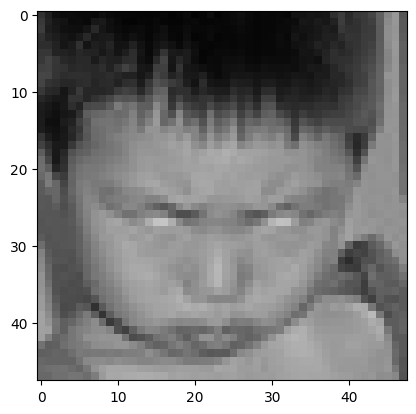

In [5]:
for category in Classes:
    path = os.path.join(DataDirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))

        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

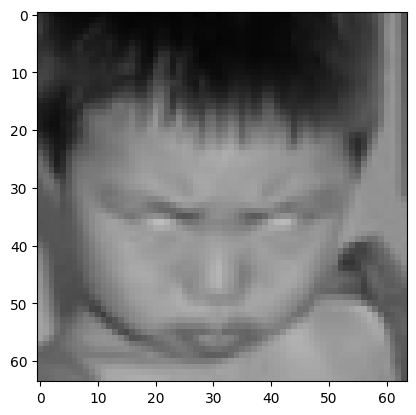

In [34]:
img_size = 64
new_array = cv2.resize(img_array, (img_size,img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [35]:
new_array.shape

(64, 64, 3)

In [36]:
training_Data = []

def create_training_Data():
    for category in Classes:
        path = os.path.join(DataDirectory, category)  # Path ke folder kategori
        class_num = Classes.index(category)  # Mendapatkan nomor kelas dari indeks
        for img in os.listdir(path):  # Mengiterasi semua gambar dalam folder kategori
            try:
                img_array = cv2.imread(os.path.join(path, img))  # Membaca gambar
                new_array = cv2.resize(img_array, (img_size, img_size))  # Resize gambar
                training_Data.append([new_array, class_num])  # Menambahkan gambar dan labelnya ke list training_Data
            except Exception as e:
                pass  # Jika ada error, gambar tersebut diabaikan

create_training_Data()

In [37]:
print(len(training_Data))

28709


In [38]:
temp = np.array(training_Data, dtype=object)

In [39]:
temp.shape #ukuran dataset

(28709, 2)

In [40]:
import random

random.shuffle(training_Data)

In [41]:
X = [] #data
y = [] #label

for features,label in training_Data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 3)

In [42]:
X.shape

(28709, 64, 64, 3)

In [43]:
X= X/255.0; #normalize

In [66]:
Y = tf.keras.utils.to_categorical(y, num_classes=7)
Y.shape

(28709, 7)

In [67]:
from tensorflow.keras import models, layers

In [68]:
new_model = models.Sequential([
    layers.InputLayer(input_shape=(64, 64, 3)),  # Ukuran input 64x64
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(7, activation='softmax')  # Output layer dengan 7 kelas (misalnya, untuk emosi)
])


In [69]:
new_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
new_model.fit(X, Y, epochs=15)

Epoch 1/15
898/898 [==============================] - 59s 63ms/step - loss: 1.5917 - accuracy: 0.3759
Epoch 2/15
898/898 [==============================] - 59s 66ms/step - loss: 1.3361 - accuracy: 0.4861
Epoch 3/15
898/898 [==============================] - 58s 64ms/step - loss: 1.2103 - accuracy: 0.5408
Epoch 4/15
898/898 [==============================] - 57s 63ms/step - loss: 1.0798 - accuracy: 0.5949
Epoch 5/15
898/898 [==============================] - 58s 64ms/step - loss: 0.9381 - accuracy: 0.6500
Epoch 6/15
898/898 [==============================] - 58s 65ms/step - loss: 0.7742 - accuracy: 0.7172
Epoch 7/15
898/898 [==============================] - 59s 65ms/step - loss: 0.6094 - accuracy: 0.7789
Epoch 8/15
898/898 [==============================] - 57s 64ms/step - loss: 0.4670 - accuracy: 0.8340
Epoch 9/15
898/898 [==============================] - 58s 65ms/step - loss: 0.3380 - accuracy: 0.8825
Epoch 10/15
898/898 [==============================] - 58s 64ms/step - loss: 0.252

In [72]:
from sklearn.model_selection import train_test_split

# Membagi data menjadi data pelatihan dan data pengujian (80% untuk pelatihan, 20% untuk pengujian)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Normalisasi data pengujian
X_test = X_test / 255.0

# Melatih model menggunakan data pelatihan
new_model.fit(X_train, Y_train, epochs=15)

# Evaluasi model menggunakan data pengujian
test_loss, test_accuracy = new_model.evaluate(X_test, Y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


Epoch 1/15
718/718 [==============================] - 52s 72ms/step - loss: 0.1015 - accuracy: 0.9677
Epoch 2/15
718/718 [==============================] - 50s 69ms/step - loss: 0.0912 - accuracy: 0.9719
Epoch 3/15
718/718 [==============================] - 48s 67ms/step - loss: 0.0846 - accuracy: 0.9734
Epoch 4/15
718/718 [==============================] - 48s 67ms/step - loss: 0.0800 - accuracy: 0.9737
Epoch 5/15
718/718 [==============================] - 47s 66ms/step - loss: 0.0606 - accuracy: 0.9826
Epoch 6/15
718/718 [==============================] - 47s 66ms/step - loss: 0.0724 - accuracy: 0.9776
Epoch 7/15
718/718 [==============================] - 48s 66ms/step - loss: 0.0650 - accuracy: 0.9800
Epoch 8/15
718/718 [==============================] - 48s 67ms/step - loss: 0.0768 - accuracy: 0.9759
Epoch 9/15
718/718 [==============================] - 50s 69ms/step - loss: 0.0570 - accuracy: 0.9829
Epoch 10/15
718/718 [==============================] - 48s 67ms/step - loss: 0.062

In [75]:
# Menggunakan model untuk prediksi gambar baru
img_path = "hhe.jpg"
img = cv2.imread(img_path)
img_resized = cv2.resize(img, (img_size, img_size))  # Resize sesuai dengan ukuran input model
img_array = np.array(img_resized) / 255.0  # Normalisasi
img_array = img_array.reshape(1, img_size, img_size, 3)  # Menambahkan dimensi batch

# Melakukan prediksi
predictions = new_model.predict(img_array)

# Menampilkan hasil prediksi
predicted_class = np.argmax(predictions)  # Mendapatkan kelas dengan probabilitas tertinggi
print(f"Predicted class: {Classes[predicted_class]}")


1/1 [==============================] - 0s 24ms/step
Predicted class: happy


In [76]:
# Menyimpan model
new_model.save('emotion_model.h5')  # Simpan model dalam format HDF5

# Memuat model yang disimpan (jika diperlukan)
loaded_model = tf.keras.models.load_model('emotion_model.h5')

Epoch 1/15
718/718 [==============================] - 51s 71ms/step - loss: 0.0702 - accuracy: 0.9787 - val_loss: 2.5675 - val_accuracy: 0.1435
Epoch 2/15
718/718 [==============================] - 52s 72ms/step - loss: 0.0493 - accuracy: 0.9838 - val_loss: 3.5224 - val_accuracy: 0.1435
Epoch 3/15
718/718 [==============================] - 51s 71ms/step - loss: 0.0561 - accuracy: 0.9820 - val_loss: 3.0132 - val_accuracy: 0.1435
Epoch 4/15
718/718 [==============================] - 52s 72ms/step - loss: 0.0467 - accuracy: 0.9865 - val_loss: 2.4159 - val_accuracy: 0.1752
Epoch 5/15
718/718 [==============================] - 50s 70ms/step - loss: 0.0519 - accuracy: 0.9831 - val_loss: 2.4327 - val_accuracy: 0.1752
Epoch 6/15
718/718 [==============================] - 51s 71ms/step - loss: 0.0410 - accuracy: 0.9876 - val_loss: 2.6463 - val_accuracy: 0.1752
Epoch 7/15
718/718 [==============================] - 50s 69ms/step - loss: 0.0453 - accuracy: 0.9854 - val_loss: 3.5141 - val_accuracy:

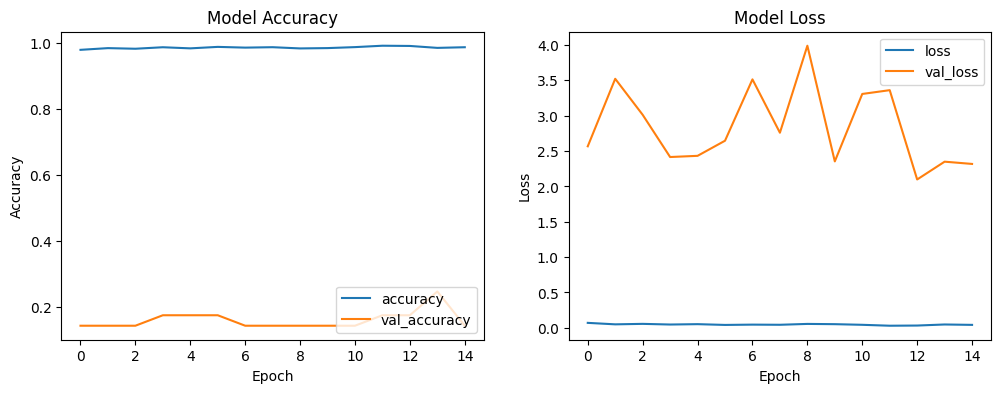

In [77]:
history = new_model.fit(X_train, Y_train, epochs=15, validation_data=(X_test, Y_test))

# Visualisasi grafik akurasi dan loss
plt.figure(figsize=(12, 4))

# Akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Model Accuracy')

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Model Loss')

plt.show()


In [1]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the model
new_model = load_model('emotion_model.h5')

font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN
rectangle_bgr = (255, 255, 255)

cap = cv2.VideoCapture(0)

if not cap.isOpened():
    raise IOError("Cannot open Camera")

while True:
    ret, frame = cap.read()
    if not ret:
        print("Failed to capture frame")
        break

    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = faceCascade.detectMultiScale(gray, 1.1, 4)
    if len(faces) > 0:
        for x, y, w, h in faces:
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = frame[y:y+h, x:x+w]
            cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

            try:
                face_roi = cv2.resize(roi_color, (64, 64))
                face_roi = np.expand_dims(face_roi, axis=0) / 255.0
                Predictions = new_model.predict(face_roi)

                status = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'][np.argmax(Predictions)]
                cv2.putText(frame, status, (x, y - 10), font, 1.5, (0, 255, 0), 2)
            except Exception as e:
                print(f"Error processing ROI: {e}")
    else:
        print("No faces detected in this frame")

    cv2.imshow('Face Emotion Recognition', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 48ms/step
No faces detected in this frame
No faces detected in this frame
1/1 [==============================] - 0s 34ms/step
No faces detected in this frame
No faces detected in this frame
1/1 [==============================] - 0s 17ms/step
